In [1]:
import pickle
from copy import deepcopy
import matplotlib.pyplot as plt
import numpy as np

In [8]:
energies = pickle.load(open('./designer_net0_data/test1/energies.pkl','rb'))
optimized_diameters = pickle.load(open('./designer_net0_data/test1/optimized_diameters.pkl','rb'))
prices = pickle.load(open('./designer_net0_data/test1/prices.pkl','rb'))

In [ ]:
data = {}
eref = -9692
for opt, e in zip(optimized_diameters, energies):
    if tuple(opt) not in data:
        data[tuple(opt)] = []
    data[tuple(opt)].append(e[0])
vals = []
labels = []
for k, v in data.items():
    labels.append(k)
    vals.append(v)

width = np.array([(np.array(optimized_diameters) == l).prod(1).sum() for l in labels])
width = 0.5 * width / np.max(width)

Text(0, 0.5, 'Energy')

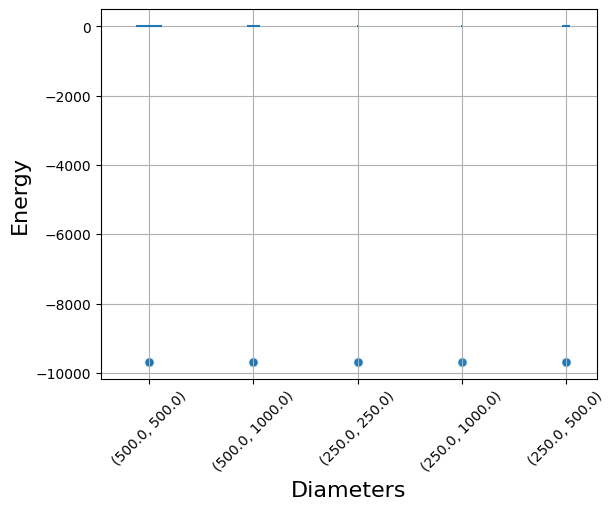

In [41]:
plt.violinplot(vals, widths=width, showextrema=False, showmedians=True)
plt.scatter(positions, energies,s=50,  alpha=0.75, edgecolors='w' )
plt.xticks(list(range(1, 1 + len(labels))), labels, rotation=45)
plt.grid()
plt.xlabel('Diameters', fontsize=16)
plt.ylabel('Energy', fontsize=16)

In [42]:
positions = []
idx = {(500,500):1, (500,1000):2, (250,250):3, (250,1000):4, (250,500):5}
for p in optimized_diameters:
    positions.append(idx[tuple(p)])


In [43]:
vals

[[3.3575392824186565,
  3.977508898389715,
  3.379365186783616,
  4.058767710592292,
  3.50782138910472,
  3.677923272591215,
  3.3201527353976417,
  3.3081985158405587,
  3.3081985158405587,
  3.373301582663771,
  3.88530950371387,
  3.437136194845152,
  3.437136194845152,
  6.385303785313226,
  3.3201527353976417,
  3.3081985158405587,
  3.9976108594291873,
  3.3122864156157448,
  5.3706943119123025,
  3.394646010352517,
  3.3081985158405587,
  3.528322075997494,
  3.3122864156157448,
  6.288973282496954,
  3.3122864156157448,
  4.332936528824575,
  3.3575392824186565,
  3.3122864156157448,
  4.4912962072212395,
  3.50782138910472,
  3.3081985158405587,
  3.3081985158405587,
  3.652241220292126,
  3.373301582663771,
  4.326171103903107,
  3.373301582663771,
  6.273680487642196,
  3.4085759342506208,
  3.3122864156157448,
  3.437136194845152,
  4.012943470470418,
  6.420142850367483,
  3.3575392824186565,
  3.3081985158405587,
  3.3081985158405587,
  3.88530950371387,
  6.273680487642